# Challenge Python

## Ejercicio 1

### Cuente el número de líneas en Python para cada archivo

Los archivos son "booking.csv.bz2", "searches.csv.bz2"

In [2]:
cd /home/dsc/Repos/Python

/home/dsc/Repos/Python


In [3]:
ls -l

total 1189924
-rw-r--r-- 1 dsc dsc  53252030 feb 13  2018 210104-180-multas-circulacion-detalle.csv
-rw-r--r-- 1 dsc dsc  51575427 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv
-rw-r--r-- 1 dsc dsc      4341 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
-rw-r--r-- 1 dsc dsc      4268 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
-rwxr-x--- 1 dsc dsc 554970628 mar 13  2018 bookings.csv.bz2*
-rw-r--r-- 1 dsc dsc   4232732 feb  4 22:35 bookings_sample.csv
-rw-r--r-- 1 dsc dsc    535893 feb  4 22:23 bookings_sample.csv.bz2
-rw-r--r-- 1 dsc dsc       429 ene 30 02:31 CAN.csv
-rw-r--r-- 1 dsc dsc     11342 ene 11 00:46 Ejercicios_INTRO_PYTHON.ipynb
-rw-r--r-- 1 dsc dsc      7369 ene 29 03:26 Ejercicios_NUMPY.ipynb
-rw-r--r-- 1 dsc dsc    121508 ene 30 03:56 Ejercicios_PANDAS.ipynb
-rw-r--r-- 1 dsc dsc  62832640 ene 30 03:41 example.db
-rw-r--r-- 1 dsc dsc     44858 ene  5 01:00 INTRO_PYTHON.ipynb
-rw-r--r-- 1 dsc dsc    342091 ene 25 03:51 MATPLO

Primermente sacaremos una muestra del archivo:

In [52]:
!bzcat bookings.csv.bz2 | head -n 10000 > bookings_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [140]:
!bzcat searches.csv.bz2 | head -n 10000 > searches_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [37]:
!bzip2 bookings_sample.csv

In [141]:
!bzip2 searches_sample.csv

In [142]:
ls -l

total 1190244
-rw-r--r-- 1 dsc dsc  53252030 feb 13  2018 210104-180-multas-circulacion-detalle.csv
-rw-r--r-- 1 dsc dsc  51575427 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv
-rw-r--r-- 1 dsc dsc      4341 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
-rw-r--r-- 1 dsc dsc      4268 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
-rw-r--r-- 1 dsc dsc     80147 feb  6 02:38 airports_pax.csv
-rwxr-x--- 1 dsc dsc 554970628 mar 13  2018 bookings.csv.bz2*
-rw-r--r-- 1 dsc dsc   4232732 feb  4 22:35 bookings_sample.csv
-rw-r--r-- 1 dsc dsc    535893 feb  4 22:23 bookings_sample.csv.bz2
-rw-r--r-- 1 dsc dsc       429 ene 30 02:31 CAN.csv
-rw-r--r-- 1 dsc dsc     11342 ene 11 00:46 Ejercicios_INTRO_PYTHON.ipynb
-rw-r--r-- 1 dsc dsc      7369 ene 29 03:26 Ejercicios_NUMPY.ipynb
-rw-r--r-- 1 dsc dsc    121508 ene 30 03:56 Ejercicios_PANDAS.ipynb
-rw-r--r-- 1 dsc dsc  62832640 ene 30 03:41 example.db
-rw-r--r-- 1 dsc dsc     44858 ene  5 01:00 INTRO_PY

Opciones:
    
    - Sin descomprimir
    - Usar parte del archivo sin comprimir

**a)**

In [39]:
import bz2

In [47]:
filename = './bookings_sample.csv.bz2'
fileBZ2=bz2.BZ2File(filename)

In [48]:
k = 0
for line in fileBZ2:
    k+=1
print (k)

10000


**b)**

In [53]:
filename = './bookings_sample.csv'
with open(filename, "r") as file_input:
    k=0
    for line in file_input:
        k+=1
print (k)

10000


In [54]:
file_input.closed

True

**or**

In [55]:
filename = './bookings_sample.csv'
with open(filename,'r') as file_input:
    lines = sum( [1 for row in file_input] )
print (lines)

10000


**¿Qué pasa si el archivo no existe? Utilice Try-except ...**

In [56]:
filename = './bookings_sample.csv'
try:
    with open(filename,'r') as file_input:
        lines = sum( [1 for row in file_input] )
    print (lines)
except IOError:
    print ("Error. Archivo no se puede abrir")
except ValueError:
    print ("No puede convertir a integer")
except:
    print ("Error desconocido")

10000


## Ejercicio 2

### Top 10 aeropuertos de llegada del mundo en 2013 (utilizando el archivo de reservas)

El aeropuerto de llegada es la columna arr_port.

Para obtener el número total de pasajeros para un aeropuerto, puede sumar la columna "pax", agrupando por arr_port.

Tenga en cuenta que hay "pax" negativo. Eso corresponde a las cancelaciones. Entonces, para obtener el número total de pasajeros que realmente han reservado, debe sumar los negativos (que eliminarán las reservas canceladas).

Imprima los 10 principales aeropuertos de llegada en la salida estándar, incluido el número de pasajeros.

Punto de bonificación: obtenga el nombre de la ciudad o el aeropuerto correspondiente a ese aeropuerto (programáticamente, sugerimos echar un vistazo a GeoBases en Github)

Punto extra: resuelva este problema utilizando pandas (en lugar de cualquier otro enfoque)

**Pasos a seguir**

**1) Familiarizate con los datos**

**¿Qué pasa si no queremos leer todo el archivo?**

1) preparar la muestra

2) read_csv con la opción "nrows"

In [57]:
import pandas as pd

In [58]:
file = pd.read_csv('bookings_sample.csv.bz2',sep = '^')

**or**

In [59]:
file = pd.read_csv('bookings.csv.bz2',sep = '^',nrows = 10000)

In [60]:
file.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [61]:
pd.set_option('display.max_columns',100) #Con esta opción definimos el número de columnas visibles

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
file.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [64]:
file.count().head(10) #Con count() vemos la cantidad de columnas con nombre y numero de filas

act_date               10000
source                 10000
pos_ctry               10000
pos_iata               10000
pos_oid                10000
rloc                   10000
cre_date               10000
duration               10000
distance               10000
dep_port               10000
dtype: int64

In [65]:
file.describe()

,duration,distance,intl,pax,year,month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,20209.543000,455.563300,0.596300,0.516300,2013.0,3.0
std,42241.125937,1738.810081,0.490663,1.783943,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7734.500000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [66]:
file.shape

(10000, 38)

In [67]:
file.info() #Con info() vemos el formato de cada campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
act_date               10000 non-null object
source                 10000 non-null object
pos_ctry               10000 non-null object
pos_iata               10000 non-null object
pos_oid                10000 non-null object
rloc                   10000 non-null object
cre_date               10000 non-null object
duration               10000 non-null int64
distance               10000 non-null int64
dep_port               10000 non-null object
dep_city               10000 non-null object
dep_ctry               10000 non-null object
arr_port               10000 non-null object
arr_city               10000 non-null object
arr_ctry               10000 non-null object
lst_port               10000 non-null object
lst_city               10000 non-null object
lst_ctry               10000 non-null object
brd_port               10000 non-null object
brd_city               10000 non-null o

In [68]:
list(file.columns) #puedes detectar fácilmente el espacio en blanco de los nombres de las columnas transformando en listas

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [69]:
file.columns = file.columns.str.strip() #quitamos los espacios en blanco de los nombres de las columnas

**2) Selecciona las columnas de interés.**

In [70]:
file = pd.read_csv('bookings_sample.csv.bz2',sep = '^',usecols = ['year','pax','arr_port'])

**3) ¿Qué hacer con NaN?**

In [71]:
file = file.dropna() #En la muestra, todo puede estar bien, pero debemos prepararnos para el caso de NaN

**4) Hacer plan de accion**

1. filtrar 2013
2. borrar la columna year (opcional)
3. groupby arr_airport  -  airport --> pax
4. sumar pax
5. ordenar
6. top 10

In [72]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
arr_port    9999 non-null object
pax         9999 non-null int64
year        9999 non-null int64
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [73]:
file = file[file['year'] == 2013]

In [74]:
file.groupby('arr_port')

In [75]:
file.groupby('arr_port').groups #Tenemos espacios en blanco en el contenido de arr_port

{'AAL     ': Int64Index([4084, 4085], dtype='int64'),
 'ABQ     ': Int64Index([1606, 1607, 3341, 3342, 6023, 6024, 6025, 6026, 6464, 6465, 7517,
             7518],
            dtype='int64'),
 'ABV     ': Int64Index([3277, 3278, 4093, 4094, 7849, 7850], dtype='int64'),
 'ABZ     ': Int64Index([3483, 3484, 6062, 6063, 6064, 6065], dtype='int64'),
 'ACC     ': Int64Index([118, 119, 2512, 2513, 2514, 2515, 6164, 6165, 6888, 6889, 8695,
             8696],
            dtype='int64'),
 'ADD     ': Int64Index([207, 208, 301, 302, 2302, 2303, 3517, 3518, 3519, 3520, 5735, 5736,
             6216],
            dtype='int64'),
 'ADZ     ': Int64Index([8892, 8893], dtype='int64'),
 'AEP     ': Int64Index([1812, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 3982, 3983,
             8402, 8403],
            dtype='int64'),
 'AER     ': Int64Index([1939, 2420, 2421], dtype='int64'),
 'AES     ': Int64Index([1701, 1702, 4999], dtype='int64'),
 'AFA     ': Int64Index([8412, 8413], dtype='int64'),


In [51]:
pd.DataFrame(file.groupby('arr_port')['pax'].sum()).sort_values('pax',ascending = False).head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


## Ajustaremos este ejercicio para todo el archivo "booking.csv.bz2"

Existen dos formas de hacer las iteraciones:
- Por iterator = True
- Por chunsize

**a)**

In [76]:
file = pd.read_csv('bookings_sample.csv.bz2',sep = '^',usecols = ['year','pax','arr_port'],iterator = True)

In [77]:
file0 = file.get_chunk(4000)
file0.shape

(4000, 3)

In [78]:
file1 = file.get_chunk(1000)
file1.shape

(1000, 3)

In [79]:
file2 = file.get_chunk(10000)
file2.shape

(4999, 3)

Ojo: mientras cargamos cada file(i) se va cargando la cantidad de registros que le asignas, y el ultimo como vemos en el ejemplo toma todos los restantes

**b)**

In [80]:
filetot = pd.read_csv('bookings_sample.csv.bz2',sep = '^',usecols = ['year','pax','arr_port'],chunksize = 1000)
type(filetot)

pandas.io.parsers.TextFileReader

In [81]:
file0 = next(filetot)
type(file0)

pandas.core.frame.DataFrame

In [82]:
file0.shape

(1000, 3)

In [95]:
chunk_tot = pd.DataFrame()
filetot = pd.read_csv('bookings_sample.csv.bz2',sep = '^',usecols = ['year','pax','arr_port'],chunksize = 1000)
for i,chunk in enumerate(filetot):
    file = chunk.dropna()
    file = file[ file['year'] == 2013 ]
    file_group = pd.DataFrame(file.groupby('arr_port')['pax'].sum())
    chunk_tot = chunk_tot.append(file_group)
top_airports = chunk_tot.reset_index().groupby('arr_port').sum().sort_values('pax',ascending = False).head()

Una vez que ejecutamos el método chunk en datos de muestra y obtenemos los mismos resultados que con el código simple, estamos listos para avanzar en el archivo grande.

Ahora ejecutamos el mismo proceso para el archivo completo

In [96]:
chunk_tot = pd.DataFrame()
filetot = pd.read_csv('bookings.csv.bz2',sep = '^',usecols = ['year','pax','arr_port'],chunksize = 1000)
for i,chunk in enumerate(filetot):
    file = chunk.dropna()
    file = file[ file['year'] == 2013 ]
    file_group = pd.DataFrame(file.groupby('arr_port')['pax'].sum())
    chunk_tot = chunk_tot.append(file_group)
top_airports = chunk_tot.reset_index().groupby('arr_port').sum().sort_values('pax',ascending = False)

Para resolver el "Bonus" tenemos que instalar geobases pip instalar geobases

In [97]:
from GeoBases import GeoBase

In [98]:
geoDict=GeoBase(data='ori_por', verbose=False)

In [99]:
type(geoDict)

GeoBases.GeoBaseModule.GeoBase

In [108]:
geoDict.fields # obteniendo los campos de la tabla

['__key__',
 '__dup__',
 '__par__',
 '__lno__',
 'iata_code',
 'icao_code',
 'faa_code',
 'is_geonames',
 'geoname_id',
 'valid_id',
 'name',
 'asciiname',
 'lat',
 'lng',
 'fclass',
 'fcode',
 'page_rank',
 'date_from',
 'date_until',
 'comment',
 'country_code',
 'cc2',
 'country_name',
 'continent_name',
 'adm1_code',
 'adm1_name_utf',
 'adm1_name_ascii',
 'adm2_code',
 'adm2_name_utf',
 'adm2_name_ascii',
 'adm3_code',
 'adm4_code',
 'population',
 'elevation',
 'gtopo30',
 'timezone',
 'gmt_offset',
 'dst_offset',
 'raw_offset',
 'moddate',
 'city_code',
 'city_name_utf',
 'city_name_ascii',
 'tvl_por_list@raw',
 'tvl_por_list',
 'state_code',
 'location_type@raw',
 'location_type',
 'wiki_link',
 'alt_name_section@raw',
 'alt_name_section',
 '__gar__']

In [101]:
geoDict.get('MAD') # Obteniendo los datos de Madrid

{'__dup__': ['MAD@1'],
 '__gar__': [],
 '__key__': 'MAD',
 '__lno__': 7379,
 '__par__': [],
 'adm1_code': '29',
 'adm1_name_ascii': 'Madrid',
 'adm1_name_utf': 'Madrid',
 'adm2_code': 'M',
 'adm2_name_ascii': 'Provincia de Madrid',
 'adm2_name_utf': 'Provincia de Madrid',
 'adm3_code': '28079',
 'adm4_code': '',
 'alt_name_section': (('es', 'Aeropuerto de Madrid', ''),
  ('es', 'Barajas', ''),
  ('de', 'Flughafen Madrid', 'p')),
 'alt_name_section@raw': 'es|Aeropuerto de Madrid|=es|Barajas|=de|Flughafen Madrid|p',
 'asciiname': 'Madrid / Barajas',
 'cc2': '',
 'city_code': 'MAD',
 'city_name_ascii': 'Madrid',
 'city_name_utf': 'Madrid',
 'comment': '',
 'continent_name': 'Europe',
 'country_code': 'ES',
 'country_name': 'Spain',
 'date_from': '',
 'date_until': '',
 'dst_offset': '2.0',
 'elevation': '609',
 'faa_code': '',
 'fclass': 'S',
 'fcode': 'AIRP',
 'geoname_id': '6299345',
 'gmt_offset': '1.0',
 'gtopo30': '575',
 'iata_code': 'MAD',
 'icao_code': 'LEMD',
 'is_geonames': 'Y',

In [102]:
geoDict.get('LHR')['name'] # obteniendo el nombre del aeropuerto del pais con siglas "LHR"

'London Heathrow Airport'

In [103]:
top_airports=top_airports.reset_index()

In [104]:
top_airports.head()

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0


In [105]:
top_airports.arr_port[0].strip() #obteniendo las siglas de la primera fila

'LHR'

In [106]:
geoDict.get( top_airports.arr_port[0].strip() )['name'] # obteniendo el aeropuerto de la primera fila de la tabla

'London Heathrow Airport'

Agregando los aeropuertos

In [110]:
top_airports['aeropuertos'] = top_airports.arr_port.map( lambda x: geoDict.get( x.strip() )['name'] )

In [111]:
top_airports.head()

,arr_port,pax,aeropuertos
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,Mc Carran International Airport
4,JFK,66270.0,John F Kennedy International Airport


In [114]:
top_airports = top_airports.astype({'pax':int})

Exportando en un archivo .csv

In [115]:
top_airports.to_csv('airports_pax.csv',sep = '^',index = False)

## Ejercicio 5

### Escribe un servicio web

Envuelva la salida del segundo ejercicio en un servicio web que devuelve los datos en formato .json (en lugar de imprimir en la salida estándar).

El servicio web debe aceptar un parámetro n> 0. Para los 10 aeropuertos principales, n es 10. Para los X aeropuertos principales, n es X

In [116]:
from flask import Flask

In [117]:
app = Flask('My first web service')
@app.route('/hello',methods=['GET'])  # GET significa devolver el mensaje en return

def get_hello():
    return "Hello from the web service"

In [118]:
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Feb/2019 02:54:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:54:30] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:54:42] "GET /hello HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2019 02:54:42] "GET /favicon.ico HTTP/1.1" 404 -


In [119]:
app = Flask('My first web service')
@app.route('/ret_number/<n>',methods=['GET'])  # GET significa devolver el mensaje en return

def get_number_1(n):
    try:
        numb=int(n)
        return 'The number is %i' % numb
    except:
        return 'Not a number'

In [121]:
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Feb/2019 02:56:42] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:56:42] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:57:16] "GET /ret_number/5 HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2019 02:57:16] "GET /favicon.ico HTTP/1.1" 404 -


In [122]:
app = Flask('My first web service')
@app.route('/ret_number/<n>',methods=['GET'])  # GET significa devolver el mensaje en return

def get_number(n):
    try:
        numb=int(n)
        return 'The number is %i' % numb
    except:
        return 'Not a number'

@app.route('/hello',methods=['GET'])

def get_hello_1():
    return "Hello from the web service"

In [123]:
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Feb/2019 02:58:09] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:58:09] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:58:17] "GET /ret_number/3 HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2019 02:58:17] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Feb/2019 02:58:23] "GET /hello HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2019 02:58:23] "GET /favicon.ico HTTP/1.1" 404 -


In [124]:
import pandas as pd

In [126]:
top_airports = pd.read_csv('airports_pax.csv',sep='^')
top_airports.head()

,arr_port,pax,aeropuertos
0,LHR,88809,London Heathrow Airport
1,MCO,70930,Orlando International Airport
2,LAX,70530,Los Angeles International Airport
3,LAS,69630,Mc Carran International Airport
4,JFK,66270,John F Kennedy International Airport


Convirtiendo a formato .json

In [128]:
top_airports.head(5).to_json()

'{"arr_port":{"0":"LHR     ","1":"MCO     ","2":"LAX     ","3":"LAS     ","4":"JFK     "},"pax":{"0":88809,"1":70930,"2":70530,"3":69630,"4":66270},"aeropuertos":{"0":"London Heathrow Airport","1":"Orlando International Airport","2":"Los Angeles International Airport","3":"Mc Carran International Airport","4":"John F Kennedy International Airport"}}'

Utilice estas páginas para verificar fácilmente la estructura y el contenido de JSON:
    
http://jsonprettyprint.com/
    
https://jsonformatter.curiousconcept.com/

In [129]:
app2 = Flask("Top Airports")
@app2.route('/top/<int:n>',methods=['GET'])

def get_top(n):
    d = top_airports.head(n)
    return d.to_json()

In [137]:
app2.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Feb/2019 03:16:35] "GET /top/15 HTTP/1.1" 200 -


En paralelo se puede escribir el siguiente codigo desde otro notebook:

In [ ]:
r = pd.read_json('http://127.0.0.1:5000/top/15')

In [ ]:
r.head()

## Ejercicio 3

### Grafique el número de búsquedas mensuales de vuelos que llegan a Málaga, Madrid o Barcelona.

Para el aeropuerto que llega, puede usar la columna Destination  en el archivo searches.csv.bz2.

Graficar una curva para Málaga, otra para Madrid y otra para Barcelona, en la misma figura.

**Pasos a seguir:**

**1) Familiarizate con los datos**

In [138]:
import pandas as pd

In [143]:
s=pd.read_csv('./searches_sample.csv.bz2',sep = '^')
#s=pd.read_csv('./searches.csv.bz2',sep = '^',nrows = 10000)

In [144]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [145]:
pd.set_option('display.max_columns', None)

In [146]:
s.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,9999.000000,9999.000000,9999.0,9999.0,9999.0
mean,0.700670,1.833583,0.0,0.0,0.0
std,0.457987,0.731857,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [149]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
Date                 9999 non-null object
Time                 9999 non-null object
TxnCode              9999 non-null object
OfficeID             9999 non-null object
Country              9999 non-null object
Origin               9999 non-null object
Destination          9999 non-null object
RoundTrip            9999 non-null int64
NbSegments           9999 non-null int64
Seg1Departure        9999 non-null object
Seg1Arrival          9999 non-null object
Seg1Date             9972 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7195 non-null object
Seg2Arrival          7195 non-null object
Seg2Date             7160 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3Date        

In [150]:
s.shape

(9999, 45)

In [151]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

**2) Selecciona las columnas de interés.**

In [152]:
s = pd.read_csv('searches_sample.csv.bz2',sep = '^',usecols = ['Date','Destination'])
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


**3) ¿Qué hacer con NaN?**

In [153]:
s = s.dropna()

**4) Hacer plan de accion**

1. filtrar solo MAD, AGP, BCN
2. crear la columna "año-mes"
3. grupo por aeropuerto, "año-mes"
4. sumar búsquedas
5. parcela

In [154]:
s = s[ s.isin(['MAD','AGP','BCN']) ]

In [155]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 2 columns):
Date           0 non-null object
Destination    335 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


no podemos usar la función de fecha en la columna 'fecha' ya que es una cadena que necesita tener algo así como año-mes

Opciones:

1) Transfming cadena hasta la fecha:

         a) parse_dates = ['Date'] - en la función csv_read
         b) pd.to_datetime - función
        
         ab-> y crea una nueva columna con funciones .month .year
    
2) usando una cuerda y obteniendo aaaa-mm directamente de ella

**1)**

#### a)

In [156]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'], parse_dates=['Date'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN']) ]
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 2 columns):
Date           335 non-null datetime64[ns]
Destination    335 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 7.9+ KB


In [157]:
s['Date'].iloc[0].month

1

#### b)

In [159]:
s=pd.read_csv('./searches_sample.csv.bz2', sep='^', usecols=['Date', 'Destination'])
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN']) ]
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 4 to 9950
Data columns (total 2 columns):
Date           335 non-null object
Destination    335 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


In [160]:
pd.to_datetime(s['Date'].iloc[0])

Timestamp('2013-01-01 00:00:00')

**2)**

In [177]:
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'],nrows = 200000)
s=s.dropna()
s=s[ s['Destination'].isin(['MAD', 'AGP', 'BCN']) ]
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 4 to 199989
Data columns (total 2 columns):
Date           7283 non-null object
Destination    7283 non-null object
dtypes: object(2)
memory usage: 170.7+ KB


In [178]:
s['Year-Month']=s['Date'].str[0:7]
s.head()

,Date,Destination,Year-Month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [180]:
s['searches'] = 1

In [181]:
s_groupby = s.groupby(['Year-Month','Destination'])['searches'].count().reset_index() # en vez de count() se puede usar size() ya que no tenemos campo de conteo
s_groupby.head()

,Year-Month,Destination,searches
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497


In [183]:
A = s_groupby.pivot('Year-Month','Destination','searches')
A

Destination,AGP,BCN,MAD
Year-Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,145,548,443
2013-05,190,504,462
2013-06,139,465,400
2013-07,90,320,266


In [185]:
import matplotlib.pyplot as plt

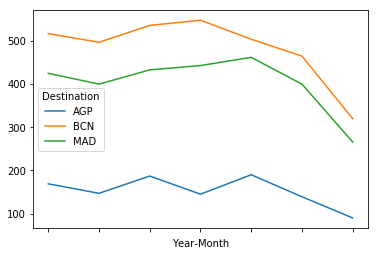

In [186]:
A.plot()

## Ajustaremos este ejercicio para todo el archivo "searches.csv.bz2"

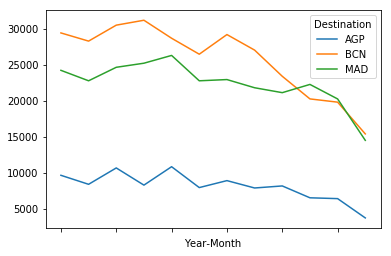

In [189]:
s_tot = pd.read_csv('./searches.csv.bz2',sep = '^',usecols = ['Date','Destination'],chunksize=10000)
sum_all_chunks = pd.DataFrame()
tot_sum_months = pd.DataFrame()
for i,chunk in enumerate(s_tot):
    s=chunk.dropna()
    s = s[  s['Destination'].isin(['MAD','AGP','BCN']) ]  # or s[  s['Destination'] == 'MAD' | s['Destination'] == 'AGP' | s['Destination'] == 'BCN' ]
    s['Year-Month'] = s['Date'].str[0:7]  #  or s['Date'].str.slice(stop=7)
    del s['Date']
    s['searches'] = 1
    s_group = s.groupby(['Destination','Year-Month'])['searches']
    chunk_months = s_group.count().reset_index()
    sum_all_chunks = sum_all_chunks.append(chunk_months)
tot_months = sum_all_chunks.groupby(['Destination','Year-Month'])['searches']
tot_sum_months = tot_months.sum().reset_index()
A = tot_sum_months.pivot('Year-Month','Destination','searches')
A.plot()

**Graficando con mas opciones:**

In [190]:
tot_sum_months[tot_sum_months['Destination']=='AGP'].reset_index()['searches']

0      9633
1      8379
2     10659
3      8265
4     10830
5      7923
6      8892
7      7866
8      8151
9      6499
10     6384
11     3696
Name: searches, dtype: int64

In [191]:
list(tot_sum_months[tot_sum_months['Destination']=='AGP'].reset_index()['searches'])

[9633, 8379, 10659, 8265, 10830, 7923, 8892, 7866, 8151, 6499, 6384, 3696]

In [192]:
agp=list(tot_sum_months[tot_sum_months['Destination']=='AGP'].reset_index()['searches'])
mad=list(tot_sum_months[tot_sum_months['Destination']=='MAD'].reset_index()['searches'])
bcn=list(tot_sum_months[tot_sum_months['Destination']=='BCN'].reset_index()['searches'])

In [203]:
tot_sum_months['Month'] = tot_sum_months['Year-Month'].str[5:7]
tot_sum_months.head()

,Destination,Year-Month,searches,Month
0,AGP,2013-01,9633,01
1,AGP,2013-02,8379,02
2,AGP,2013-03,10659,03
3,AGP,2013-04,8265,04
4,AGP,2013-05,10830,05


In [204]:
plotdate=list(tot_sum_months.reset_index()['Month'].unique())

Text(0.5,1,'Year 2013')

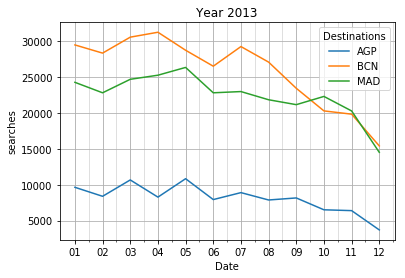

In [205]:
import numpy as np
fig=plt.figure() 
#fig.set_size_inches(12,6) 

ax = plt.gca() #get current axes
#.add_subplot(1,1,1)  
plt.xlabel("Date")
plt.ylabel("searches")
#plt.xticks(range(len(plotdate)), plotdate,size='small')
plt.xticks(range(len(plotdate)), plotdate)

major_ticks = range(len(plotdate))                                             
minor_ticks = np.arange(0, len(plotdate), 0.5) 
plt.gca().set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)   
ax.grid(which='both') 
ax.grid(which='minor', alpha=0.5)                                                
ax.grid(which='major', alpha=1)

plt.plot(agp, label='AGP')
plt.plot(bcn, label='BCN')
plt.plot(mad, label='MAD')

plt.grid(True)

#plt.legend(["Madrid", "Barcelona", "Malaga"],loc='center left', frameon=True)
plt.legend(["AGP","BCN", "MAD"],loc='best', frameon=True, title="Destinations")

#plt.bar(range(len(y)), y, align='center')

plt.title("Year 2013")